In [9]:
# from utils import plot_network, plot_matrix

import networkx as nx
# import metis
# import pandas as pd
from scipy.sparse import csc_matrix, csr_matrix, save_npz
import scipy.sparse.csgraph as csgraph
import nxmetis
import scipy
import numpy as np
from bbd_matrix import bbd_matrix, block_vector

import time

In [ ]:
# Generating a random BBD Matrix

import numpy as np

def random_bordered_block_diagonal_matrix(block_sizes, border_size, selected_columns, min_value=1, max_value=10):
    num_blocks = len(block_sizes)
    total_size = sum(block_sizes) + num_blocks - 4

    matrix = np.zeros((total_size, total_size))

    current_row = 0
    current_col = 0

    for i, block_size in enumerate(block_sizes):
        # Fill the diagonal block
        matrix[current_row:current_row+block_size, current_col:current_col+block_size] = np.random.randint(min_value, max_value, size=(block_size, block_size))
            
        # Move to the next block position
        current_row += block_size 
        current_col += block_size 

    # Fill the last row with values for selected columns
    last_row_values = np.random.randint(min_value, max_value, size=len(selected_columns))
    # matrix[-1, :] = last_row_values
    # matrix[:, -1] = last_row_values

    return matrix

# Example usage:
block_sizes = [6, 6, 6, 6]  # Sizes of diagonal blocks
border_size = 0
selected_columns = [0]  # Columns to fill in the last row

matrix = scipy.sparse.csr_matrix(random_bordered_block_diagonal_matrix(block_sizes, border_size, selected_columns))
matrix2 = random_bordered_block_diagonal_matrix(block_sizes, border_size, selected_columns)
save_npz('bbd.npz', matrix)
# print(matrix)

# import numpy as np
# import scipy.sparse as sp

# def create_bbd_matrix(size, block_size, sc, min_value=1, max_value=10):
#     # Create a sparse matrix with block diagonal structure and a border
#     matrix = sp.lil_matrix((size, size))
#     num_blocks = size // block_size

#     # Add diagonal blocks
#     for i in range(num_blocks):
#         start = i * block_size
#         end = start + block_size
#         matrix[start:end, start:end] = sp.eye(block_size) * (i + 1)
        
#     # Fill the last row with values for selected columns
#     last_row_values = np.random.randint(min_value, max_value, size=len(sc))
#     matrix[-1, sc] = last_row_values

#     # Add border elements
#     matrix[-1, :] = 1  # last row
#     matrix[:, -1] = 1  # last column
# #     matrix[-1, -1] = 1  # Correcting the corner element if needed

#     return matrix

# size = 10
# block_size = 5

# # # Example usage:
# block_sizes = [4, 4, 4, 5, 3]  # Sizes of diagonal blocks
# border_size = 0
# sc = [0, 1, 2, 3, 4, 5, 6, 7]  # Columns to fill in the last row

# matrix2 = create_bbd_matrix(size, block_size, sc)
# matrix = scipy.sparse.csr_matrix(matrix2)


# # Permute the matrix

# def pm(matrix):
    
#     pmm = np.random.permutation(matrix)

#     return pmm

# pmm = pm(matrix2)
# print(pmm)
# pm = scipy.sparse.csr_matrix(pmm)


import matplotlib.pyplot as plt # Visualizing it
plt.figure(figsize = (8,6))
plt.spy(matrix, markersize = 5)
plt.title('Random BBD Matrix')
plt.xlabel('Col Index')
plt.ylabel('Row Index')
plt.show()



# import matplotlib.pyplot as plt # Visualizing it
# plt.figure(figsize = (8,6))
# plt.spy(pmm, markersize = 5)
# plt.title('Permuted Random Matrix')
# plt.xlabel('Col Index')
# plt.ylabel('Row Index')
# plt.show()

# from scipy.sparse import random
# from scipy.sparse import csr_matrix




# G = nx.Graph(matrix)

# # Obtain the adjacency matrix of the graph
# adj_matrix = nx.adjacency_matrix(G)

# # # Convert the adjacency matrix to a dense matrix
# dense_adj_matrix = adj_matrix.todense()

# # Check if the adjacency matrix is symmetric
# is_symmetric = np.array_equal(dense_adj_matrix, dense_adj_matrix.T)

# if is_symmetric:
#     print("The adjacency matrix is symmetric.")
# else:
#     print("The adjacency matrix is not symmetric.")





In [ ]:
from scipy.sparse import csr_matrix

data = np.load('csr_wecc.npz')


# Retrieve the shape of the matrix
matrix_shape = tuple(data['shape'])

# Generate random data for the same number of non-zero elements
random_data = np.random.rand(len(data['data']))

# Construct the random CSR matrix using the existing structure and new random data
random_matrix = csr_matrix((random_data, data['indices'], data['indptr']), shape=matrix_shape)

# To verify the structure, we display the matrix's shape and a small part of it
random_matrix.shape, random_matrix.toarray()[:5, :5]  # Displaying a small part to check the random content


import matplotlib.pyplot as plt # Visualizing it
plt.figure(figsize = (8,6))
plt.spy(random_matrix, markersize = 5)
plt.title('Random Matrix')
plt.xlabel('Col Index')
plt.ylabel('Row Index')
plt.show()

G = nx.Graph(random_matrix)

# Obtain the adjacency matrix of the graph
adj_matrix = nx.adjacency_matrix(G)

# Convert the adjacency matrix to a dense matrix
dense_adj_matrix = adj_matrix.toarray()

# Check if the adjacency matrix is symmetric
is_symmetric = np.array_equal(dense_adj_matrix, dense_adj_matrix.T)

if is_symmetric:
    print("The adjacency matrix is symmetric.")
else:
    print("The adjacency matrix is not symmetric.")


In [ ]:
from scipy.sparse import random
def sm(n, density = 0.1):
    smatrix = random(n,n, density = density, format = 'csr')
    return smatrix

sm = sm(15) # A random csr sparse matrix with 15 nodes
G = nx.Graph(sm)
nx.draw(G)


In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

def create_dense_block_diagonal_matrix(matrix_size, num_above, num_below, density=0.01):
    # Total number of blocks
    total_blocks = 1 + num_above + num_below
    
    # Determine block size based on total blocks
    block_size = matrix_size // total_blocks
    
    # Initialize data structures for CSR matrix
    data = []
    indices = []
    indptr = [0]
    
    # Populate blocks and random entries
    for i in range(matrix_size):
        row_data = []
        row_indices = []
        
        # Add block diagonal elements
        block_index = i // block_size
        main_diagonal_col = i
        row_data.append(np.random.rand())
        row_indices.append(main_diagonal_col)
        
        # Add diagonals above the main diagonal
        for k in range(1, num_above +1):
            if i - k * block_size >= 0:  # Check bounds
                row_data.append(np.random.rand())
                row_indices.append(i - k * block_size)
        
        # Add diagonals below the main diagonal
        for k in range(1, num_below +1):
            if i + k * block_size < matrix_size:  # Check bounds
                row_data.append(np.random.rand())
                row_indices.append(i + k * block_size)

        # # Add additional random entries with specified density
        # number_of_entries = 10*int(matrix_size * density) - len(row_data)
        # additional_cols = np.random.choice(matrix_size, number_of_entries, replace=False)
        # for col in additional_cols:
        #     if col not in row_indices:  # Ensure no duplicate entries in the row
        #         row_data.append(np.random.rand())
        #         row_indices.append(col)
        
        # Sort indices for correct CSR format and update data and indptr
        sorted_indices = np.argsort(row_indices)
        data.extend(np.array(row_data)[sorted_indices])
        indices.extend(np.array(row_indices)[sorted_indices])
        indptr.append(len(data))
    
    # Create the CSR matrix
    matrix = csr_matrix((data, indices, indptr), shape=(matrix_size, matrix_size))
    return matrix

# Define matrix size and number of diagonals
matrix_size = 10 # Adjust this to fit your specific needs
num_above = 1  # Number of diagonals above the main diagonal
num_below = 0  # Number of diagonals below the main diagonal

# Create the matrix with additional random entries
block_matrix = create_dense_block_diagonal_matrix(matrix_size, num_above, num_below)
bm = block_matrix.todense()
# Print a portion of the matrix to verify the structure
print("Matrix Sample:\n", block_matrix.toarray()[:300, :300])

import matplotlib.pyplot as plt # Visualizing it
plt.figure(figsize = (8,6))
plt.spy(block_matrix, markersize = 5)
plt.title('Random Matrix')
plt.xlabel('Col Index')
plt.ylabel('Row Index')
plt.show()

G = nx.Graph(block_matrix)

# Obtain the adjacency matrix of the graph
adj_matrix = nx.adjacency_matrix(G)

# Convert the adjacency matrix to a dense matrix
dense_adj_matrix = adj_matrix.toarray()

# Check if the adjacency matrix is symmetric
is_symmetric = np.array_equal(dense_adj_matrix, dense_adj_matrix.T)

if is_symmetric:
    print("The adjacency matrix is symmetric.")
else:
    print("The adjacency matrix is not symmetric.")

In [ ]:
# Permute the matrix

def pm(matrix):
    
    pmm = np.random.permutation(matrix)

    return pmm

pmm = pm(bm)
print(pmm)
pm = scipy.sparse.csr_matrix(pmm)

In [10]:
J_csr = scipy.sparse.load_npz('csr_wecc179.npz')
# sm = scipy.sparse.csr_matrix(sm)
A = J_csr
num_parts = 5
t0 = time.time()

G2 = nx.Graph(A)
G = nx.Graph()
nodess = [x+1 for x in G2.nodes]
edgess = [(x+1, y+1) for (x,y) in G2.edges]
G.add_nodes_from(nodess)
G.add_edges_from(edgess)

t1 = time.time()

edgecuts, partitions  = nxmetis.partition(G,num_parts,recursive=False, options=nxmetis.MetisOptions(rpart=0,niter=1))


G = nx.Graph(A)


# Obtain the adjacency matrix of the graph
adj_matrix = nx.adjacency_matrix(G)

# Convert the adjacency matrix to a dense matrix
dense_adj_matrix = adj_matrix.todense()

# Check if the adjacency matrix is symmetric
is_symmetric = np.array_equal(dense_adj_matrix, dense_adj_matrix.T)

if is_symmetric:
    print("The adjacency matrix is symmetric.")
else:
    print("The adjacency matrix is not symmetric.")



The adjacency matrix is symmetric.


In [11]:
t2 = time.time()
org_matrix = A

nodes_part =  {}
outside_node = {}
for x in range(len(partitions)):
    nodes_part[x] = partitions[x]
    outside_node[x] = []

t3 = time.time()

common_edges = []
partition_edges = {}
all_partition_edges = []
for part in nodes_part.keys():
    partition_edges[part] = []
    for e in G.edges():
        if e[0] in nodes_part[part] and e[1] in nodes_part[part]:
            partition_edges[part].append(e)
            all_partition_edges.append(e)
        else:
            if e[0] not in nodes_part[part] and e[1] not in nodes_part[part]:
                continue
            elif e[0] not in nodes_part[part]:
                outside_node[part].append(e[0])
            else:
                outside_node[part].append(e[1])


In [12]:
t4 = time.time()

for e in G.edges():
    if e not in all_partition_edges: 
        common_edges.append(e)

t5 = time.time()

common_nodes = set([e[0] for e in common_edges] +  [e[1] for e in common_edges])

t6 = time.time()

part_nodes_nocommon = {}
part_nodes_common = {}
for x in nodes_part.keys():
    part_nodes_nocommon[x] = [y for y in nodes_part[x] if y not in common_nodes] 
    part_nodes_common[x] = [y for y in nodes_part[x] if y in common_nodes]

t7 = time.time()

all_graphs = {}
all_graphs_edges = {}
dmatrix = {}
for x in part_nodes_nocommon.keys():
    all_graphs[x] = G.subgraph(part_nodes_nocommon[x])
    all_graphs_edges[x] = all_graphs[x].edges()
    dmatrix[x] = csc_matrix(all_graphs[x])


In [13]:
t8 = time.time()

index_order = []
for x in all_graphs.keys():
    perm = nxmetis.node_nested_dissection(all_graphs[x], options=nxmetis.MetisOptions(niter=1))
#         perm = all_graphs[x].nodes()
    perm = nxmetis.node_nested_dissection(all_graphs[x], options=nxmetis.MetisOptions(niter=1))
    index_order += perm

t9 = time.time()

Gcorner = nx.Graph()
Gcorner.add_edges_from(common_edges)
permg = nxmetis.node_nested_dissection(Gcorner)
#     permg = Gcorner.nodes()

index_order += permg

t10 = time.time()

index_order = np.array(index_order) - 1
#final_matrix = org_matrix[index_order[:,None],index_order]
final_matrix = org_matrix.tocsr()[index_order[:, None], index_order]


In [14]:
t11 = time.time()

corner_begin = np.sum([len(all_graphs[x].nodes) for x in all_graphs.keys()])
begin = 0
blocks = {}
for x in all_graphs.keys():
    blocks['diagonal_{}'.format(x)] = final_matrix[begin: begin+len(all_graphs[x].nodes()):1, begin: begin+len(all_graphs[x].nodes()):1]
    # final_matrix[corner_begin::1,begin: begin+len(all_graphs[x].nodes()):1] = 0
    # final_matrix[begin: begin+len(all_graphs[x].nodes()):1, corner_begin::1] = 0
    blocks['lower_{}'.format(x)] = final_matrix[corner_begin::1,begin: begin+len(all_graphs[x].nodes()):1]
    blocks['upper_{}'.format(x)] = final_matrix[begin: begin+len(all_graphs[x].nodes()):1, corner_begin::1]
    begin += len(all_graphs[x].nodes())
# final_matrix[begin: begin+len(Gcorner.nodes()):1, begin: begin+len(Gcorner.nodes()):1] = 0
blocks['corner'] = final_matrix[begin: begin+len(Gcorner.nodes()):1, begin: begin+len(Gcorner.nodes()):1]

t12 = time.time()

N = np.max(list(nodes_part.keys()))+2

BBD = bbd_matrix(N)
i = 0
j = 0
for x in blocks.keys():
    if "diagonal" in x: 
        i += 1 
        idx = int(x.split("_")[-1])
        BBD.add_diag_block(csc_matrix(blocks[x]),idx)
    elif "upper" in x: 
        idx = int(x.split("_")[-1])
        BBD.add_right_block(csc_matrix(blocks[x]),idx)
    elif "lower" in x: 
        idx = int(x.split("_")[-1])
        BBD.add_lower_block(csc_matrix(blocks[x]),idx)
    elif "corner"  in x: 
        j += 1 
        idx = int(N-1)
        BBD.add_diag_block(csc_matrix(blocks[x]),idx)
    else: 
        print("WARNING unknown block!! --> ",x )

t13 = time.time()

elapsed = t13 - t0
time_str = """
Graph:        {:10.2e} {:8.2%}
NxMetis:      {:10.2e} {:8.2%}
OutN:         {:10.2e} {:8.2%}
PartE:        {:10.2e} {:8.2%}
ComE:         {:10.2e} {:8.2%}
ComN:         {:10.2e} {:8.2%}
PartN:        {:10.2e} {:8.2%}
AllGr:        {:10.2e} {:8.2%}
IdxOrd:       {:10.2e} {:8.2%}
CrnOrd:       {:10.2e} {:8.2%}
Final:        {:10.2e} {:8.2%}
BlkSort:      {:10.2e} {:8.2%}
BBD:          {:10.2e} {:8.2%}
Total:        {:10.2e}
""".format(
    t1 - t0, (t1 - t0)/elapsed,
    t2 - t1, (t2 - t1)/elapsed,
    t3 - t2, (t3 - t2)/elapsed,
    t4 - t3, (t4 - t3)/elapsed,
    t5 - t4, (t5 - t4)/elapsed,
    t6 - t5, (t6 - t5)/elapsed,
    t7 - t6, (t7 - t6)/elapsed,
    t8 - t7, (t8 - t7)/elapsed,
    t9 - t8, (t9 - t8)/elapsed,
    t10 - t9, (t10 - t9)/elapsed,
    t11 - t10, (t11 - t10)/elapsed,
    t12 - t11, (t12 - t11)/elapsed,
    t13 - t12, (t13 - t12)/elapsed,
    elapsed,
)

print(time_str)
print("Diagonal blocks = ", i)
print("Corner blocks = ", j)

BBD.print_summary()



Graph:          3.43e-02    0.77%
NxMetis:        9.27e-01   20.81%
OutN:           3.27e-04    0.01%
PartE:          8.29e-01   18.59%
ComE:           4.22e-02    0.95%
ComN:           5.70e-04    0.01%
PartN:          6.24e-04    0.01%
AllGr:          1.48e+00   33.28%
IdxOrd:         1.59e-02    0.36%
CrnOrd:         3.88e-03    0.09%
Final:          1.11e+00   24.94%
BlkSort:        4.24e-03    0.10%
BBD:            3.68e-03    0.08%
Total:          4.46e+00

Diagonal blocks =  5
Corner blocks =  1

        Partition Size:       5
        Total NNZ:         1794
        Min Block Size:      24
        Min Block NNZ:       78
        Max Block Size:      46
        Max Block NNZ:      217
        Corner Size:        208
        Corner NNZ:         988
        



    Graph:          4.76e-02   47.16%
    NxMetis:        4.71e-03    4.66%
    OutN:           2.62e-06    0.00%
    PartE:          2.49e-02   24.69%
    ComE:           1.32e-02   13.11%
    ComN:           1.67e-05    0.02%
    PartN:          3.79e-05    0.04%
    AllGr:          1.34e-03    1.33%
    IdxOrd:         6.08e-03    6.02%
    CrnOrd:         2.58e-04    0.26%
    Final:          3.48e-04    0.34%
    BlkSort:        1.19e-03    1.18%
    BBD:            1.20e-03    1.19%
    Total:          1.01e-01
    

        Partition Size:       5
        Total NNZ:         2238
        Min Block Size:      59
        Min Block NNZ:      307
        Max Block Size:      72
        Max Block NNZ:      486
        Corner Size:         48
        Corner NNZ:         248
        


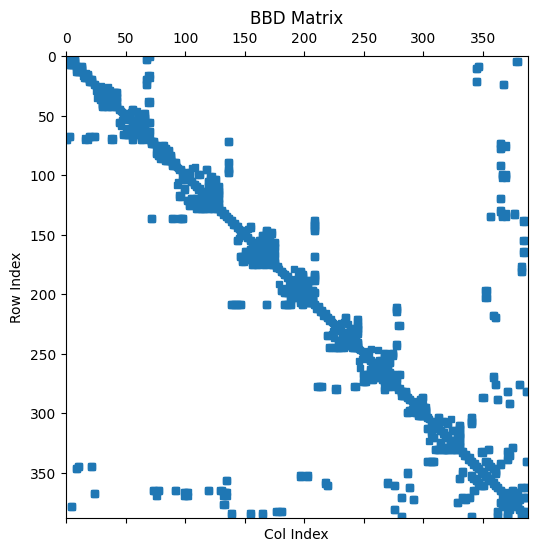

In [18]:
from bbd_matrix import bbd_matrix
from partitionutil import *

BBD = admittance_to_BBD(A,5)
array = BBD[0].to_dense()

import matplotlib.pyplot as plt # Visualizing it
plt.figure(figsize = (8,6))
plt.spy(array, markersize = 5)
plt.title('BBD Matrix')
plt.xlabel('Col Index')
plt.ylabel('Row Index')
plt.show()

# array2 = A.todense()
array3 = csr_matrix(array)
save_npz('csr_wecc179_5parts.npz', array3)


In [ ]:
a = all_graphs
for n in a.values():
    plt.figure()
    nx.draw(n, with_labels = True)
    plt.title('Graphs')
    plt.show()

In [ ]:
J_csr = scipy.sparse.load_npz('csr_wecc.npz')
array = J_csr.toarray()

import matplotlib.pyplot as plt # Visualizing it
plt.figure(figsize = (8,6))
plt.spy(array, markersize = 5)
plt.imshow(array)
plt.title('System Matrix')
plt.xlabel('Col Index')
plt.ylabel('Row Index')
plt.show()
